In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
 
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        #activation = self.get_activation(x_1)
        #y_pred = np.where(activation >0, 1, -1)
        #return y_pred
        return np.where(self.get_activation(x_1) > 0, 1, -1)
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
     
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y - activation).sum()/2.0
                
            self.list_of_errors.append(error)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))

In [137]:
diag = pd.read_csv('./data/breast_cancer.csv')

In [138]:
X = diag[['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']]

In [139]:
y = diag[['diagnosis']]

In [140]:
y = y['diagnosis'].apply(lambda x: 1 if(x == 'M') else -1)


In [141]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568   -1
Name: diagnosis, Length: 569, dtype: int64

In [142]:
perceptron = Perceptron(epochs=100,eta=0.000000001)

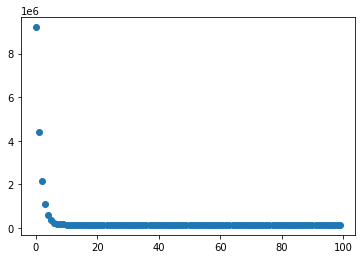

In [143]:
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [146]:
X_std

array([[ 0.9843749 ,  2.48757756, -2.07333501,  2.10952635,  2.65287398],
       [ 1.90870825,  0.74240195, -0.35363241, -0.14674897, -0.02384586],
       [ 1.55888363,  1.18133606,  0.45618695,  0.85497394,  1.36347845],
       ...,
       [ 0.57795264,  0.1806983 ,  2.0455738 ,  0.3267666 ,  0.04658753],
       [ 1.73521799,  1.0095027 ,  2.33645719,  3.19760468,  3.296944  ],
       [-1.34778924, -0.46615196,  1.22179204, -1.30583065, -1.11487284]])

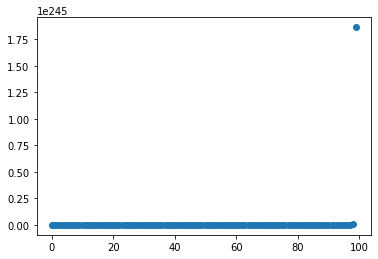

In [147]:
perceptron = Perceptron(epochs=100,eta=0.01)
perceptron.fit(X_std,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)


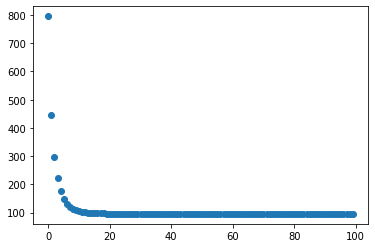

In [148]:
perceptron = Perceptron(epochs=100,eta=0.001)
perceptron.fit(X_std,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

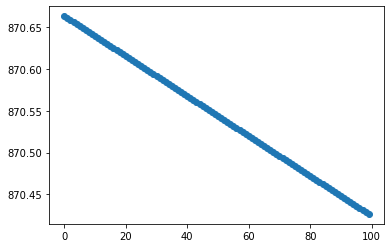

In [150]:
perceptron = Perceptron(epochs=100,eta=0.000000001)
perceptron.fit(X_std,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2)

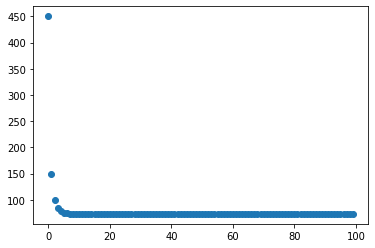

In [153]:
perceptron = Perceptron(eta=0.001, epochs=100)
perceptron.fit(X_train, y_train)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 


In [154]:
y_pred = perceptron.predict(X_test)

In [155]:
good = y_test[y_test == y_pred].count()
total = y_test.count()
print('result: {}'.format(100*good/total))

result: 89.47368421052632
